This jupyter Notebook consists the second project assigned by Associate Professor Panos Louridas for the course Applied Machine Learning at the 7th Semester in the Department of Management Science and Technology (DMST) of the Athens University of Economics and Business (AUEB).



>Author: Ferdinandos Tzimas<br />
>MSc Student in Business Analytics at Athens University of Economics and Business<br />
>BSc Department of Science and Technology at Athens University of Economics and Business<br />
>Github: https://github.com/ferdinandostzimas<br />
>LinkedIn: https://www.linkedin.com/in/ferdinandos-tzimas-903829182/

# Exploring Why Civil Resistance Works

In this assignment, you will replicate some of the findings of a well-received book, [Why Civil Resistance Works](https://www.ericachenoweth.com/research/wcrw) by [Erical Chenoweth](https://www.ericachenoweth.com/) and Maria J. Stephan. The two authors examined whether nonviolent campaigns are more effective than violent campaigns. They found that yes; from a data set containing details of campaigns from 1900 onwards, they found that in general peaceful campaigns are more effective in achieving their aims than violent ones.

To answer the following questions you will use the data that the authors helpfully provide at <https://www.ericachenoweth.com/wp-content/uploads/2012/01/Data-and-Replication-Files-3.zip>. The data is in Stata format, which pandas can read without a problem. To understand the data, read the documentation at <https://www.ericachenoweth.com/wp-content/uploads/2019/07/WCRW-Appendix.pdf> (in particular, Table WA.7).

---

> Panos Louridas, Associate Professor <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> louridas@aueb.gr

# Data
The data that we will be using can be found within the files of this repository.

The following answers assume that the data will reside in the same directory as this notebook.

In [1]:
import numpy as np
import matplotlib.patches as mpatches
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

%matplotlib inline

In [3]:
df=pd.read_stata('WCRWreplication.dta')
df.head(100)

,defect,outcome,peakmembership,eyear,byear,location,campaign,target,lccode,tccode,...,lmtnest,ef,loclpolity1,loclcap1,loclcap2,loclcap3,loclcap4,mempc,demdum,recur1
0,1.0,5,50000.0,1959,1956,Cuba,Cuban Revolution,Batista regime,40.0,40.0,...,1.694107,0.213400,-9.0,0.0,1.0,0.0,0.0,1.226839,0.0,0.0
1,0.0,3,5000.0,1920,1918,Haiti,Caco Revolt,U.S. occupation,41.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,1.0,5,30000.0,1985,1985,Haiti,,Jean Claude Duvalier,41.0,41.0,...,2.797281,0.095000,-9.0,1.0,0.0,0.0,0.0,1.200712,0.0,0.0
3,0.0,3,650.0,1924,1916,Dominican Republic,Dominican insurgency,U.S. occupation,42.0,2.0,...,NaN,NaN,NaN,1.0,0.0,0.0,0.0,NaN,0.0,NaN
4,1.0,3,NaN,1965,1965,Dominican Republic,leftists,Loyalist regime,42.0,42.0,...,2.856470,0.386800,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,3,1000.0,1923,1923,Bulgaria,Agrarian League movement,Military regime,355.0,355.0,...,NaN,NaN,-3.0,0.0,1.0,0.0,0.0,NaN,0.0,NaN
96,0.0,5,70000.0,1989,1989,Bulgaria,,Communist regime,355.0,355.0,...,3.058707,0.299485,-7.0,0.0,0.0,1.0,0.0,1.225560,1.0,0.0
97,0.0,4,15000.0,1992,1992,Moldova,Dniestr,Moldovan regime,359.0,359.0,...,0.000000,0.510301,5.0,0.0,1.0,0.0,0.0,1.145338,1.0,0.0
98,0.0,3,15000.0,1907,1907,Romania,Peasant Rebellion,land dist system,360.0,360.0,...,NaN,NaN,-6.0,0.0,0.0,1.0,0.0,NaN,0.0,NaN


## Question 1. Frequency of Nonviolent and Violent Campaign End Years

Create a plot showing the frequency of nonviolent and violent campaigns; the frequency should be counted based on their end years, at decades. The violent and nonviolent campaign counts should be stacked on each other.

In [8]:
#question no1
df['decade']=df['eyear'].apply(lambda x:(x//10)*10)
df['decade'].value_counts()

1990    68
1980    45
2000    42
1970    33
1950    28
1940    26
1960    24
1920    19
1930    15
1900    14
1910     9
Name: decade, dtype: int64

<AxesSubplot:xlabel='decade', ylabel='Count'>

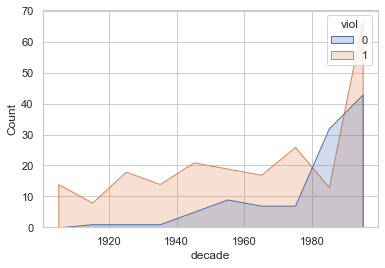

In [9]:
sns.set(style='whitegrid')
sns.histplot(data=df, x="decade", hue="viol",element='poly')

## Question 2: Number of Nonviolent Campaigns and Percentage of Success

Create a plot showing, for each decade from 1940 onwards, the number of nonviolent campaigns and the percentage of success. Your plot will have two vertical axes, one for each of the metrics.

In [10]:
#question no2
#df2 contains only data from 1940 onward
df2=df.loc[df['decade']>1930]
df2.head(100)

,defect,outcome,peakmembership,eyear,byear,location,campaign,target,lccode,tccode,...,ef,loclpolity1,loclcap1,loclcap2,loclcap3,loclcap4,mempc,demdum,recur1,decade
0,1.0,5,50000.0,1959,1956,Cuba,Cuban Revolution,Batista regime,40.0,40.0,...,0.213400,-9.0,0.0,1.0,0.0,0.0,1.226839,0.0,0.0,1950
2,1.0,5,30000.0,1985,1985,Haiti,,Jean Claude Duvalier,41.0,41.0,...,0.095000,-9.0,1.0,0.0,0.0,0.0,1.200712,0.0,0.0,1980
4,1.0,3,NaN,1965,1965,Dominican Republic,leftists,Loyalist regime,42.0,42.0,...,0.386800,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,1960
9,1.0,5,100000.0,2000,1987,Mexico,,corrupt govt,70.0,70.0,...,0.541779,-3.0,0.0,0.0,0.0,1.0,1.001202,NaN,0.0,2000
10,0.0,3,1000000.0,2006,2006,Mexico,,Calderon regime,70.0,70.0,...,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,1.0,4,NaN,1990,1989,Benin,,Communist regime,434.0,434.0,...,0.622278,-7.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,1990
127,0.0,3,10000.0,1992,1991,Niger,,Military rule,436.0,436.0,...,0.636900,-7.0,1.0,0.0,0.0,0.0,1.027085,0.0,0.0,1990
128,0.0,3,40000.0,2005,2002,Ivory Coast,PMIC,incumbent regime,437.0,437.0,...,NaN,4.0,0.0,1.0,0.0,0.0,1.086403,NaN,0.0,2000
129,0.0,5,3000.0,1990,1989,Liberia,anti-Doe rebels,Doe regime,450.0,450.0,...,0.899182,-6.0,1.0,0.0,0.0,0.0,1.023649,NaN,0.0,1990


In [11]:
#removed ongoing campaigns(active)
df2=df2[df2['ongoing']==0]
#df2[df2['ongoing']==1][['ongoing','viol','failure','decade']]

In [12]:


#break the dataframe to decades and get number of successful and total number of campaigns that were violent
df3=df2.loc[df2['viol']==0]
df3=df3.groupby('decade').count().max(axis=1)
df21=df2.loc[df2['success']==1]
df21=df21.loc[df21['viol']==0]

df4=df21.groupby('decade').count().max(axis=1)
df3
b=(df4/df3).tolist()
df4




    


decade
1940     2
1950     3
1960     3
1970     4
1980    17
1990    12
2000    14
dtype: int64

In [13]:
#just checking...
df4/df3

decade
1940    0.400000
1950    0.333333
1960    0.428571
1970    0.571429
1980    0.531250
1990    0.521739
2000    0.736842
dtype: float64

In [14]:
#break them again and assign the corresponding value to all rows of the new df2 column(persuc:percentage of success)
df2['persuc']=0
j=0
for i in range(1940,2010,10):
    df2.loc[df2['decade']==i,'persuc']=b[j]
    j+=1
df2.head(5)



,defect,outcome,peakmembership,eyear,byear,location,campaign,target,lccode,tccode,...,loclpolity1,loclcap1,loclcap2,loclcap3,loclcap4,mempc,demdum,recur1,decade,persuc
0,1.0,5,50000.0,1959,1956,Cuba,Cuban Revolution,Batista regime,40.0,40.0,...,-9.0,0.0,1.0,0.0,0.0,1.226839,0.0,0.0,1950,0.333333
2,1.0,5,30000.0,1985,1985,Haiti,,Jean Claude Duvalier,41.0,41.0,...,-9.0,1.0,0.0,0.0,0.0,1.200712,0.0,0.0,1980,0.531250
4,1.0,3,NaN,1965,1965,Dominican Republic,leftists,Loyalist regime,42.0,42.0,...,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,1960,0.428571
9,1.0,5,100000.0,2000,1987,Mexico,,corrupt govt,70.0,70.0,...,-3.0,0.0,0.0,0.0,1.0,1.001202,NaN,0.0,2000,0.736842
10,0.0,3,1000000.0,2006,2006,Mexico,,Calderon regime,70.0,70.0,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2000,0.736842


In [17]:
df2final=df2.loc[df2['viol']==0]
df2final=df2final.groupby('decade').agg({'byear':'count','persuc':'first'})
df2final

,byear,persuc
decade,,
1940,5,0.400000
1950,9,0.333333
1960,7,0.428571
1970,7,0.571429
1980,32,0.531250
1990,23,0.521739
2000,19,0.736842


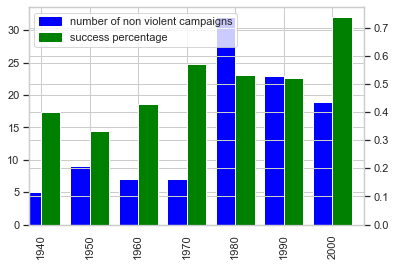

In [19]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

df2final.byear.plot(kind='bar', color='blue', ax=ax, width=width, position=1)
df2final.persuc.plot(kind='bar', color='green', ax=ax2, width=width, position=0)


#ax.set_ylabel('number of non violent campaigns')
#ax2.set_ylabel('percentage of success per decade')
ax.set_xlabel(None)


NA = mpatches.Patch(color='blue', label='number of non violent campaigns')
EU = mpatches.Patch(color='green', label='success percentage')

plt.legend(handles=[NA,EU], loc=2)

plt.show()

## Question 3: Success Rate by Decade

Create a plot showing the success rate for violent and nonviolent campaigns by decade. Your plot should show that nonviolent campaigns have higher success probabilities:

In [40]:
#third question
# total number of violent campaigns from 1940 to latest,except the ongoing
dfv=df2.loc[df2['viol']==1].groupby('decade').count().max(axis=1)
dfv

decade
1940    21
1950    19
1960    17
1970    26
1980    13
1990    45
2000     7
dtype: int64

In [41]:
#for the violent success percentage
#first find number of violent and succesful campaigns
dfvs=df2[df2['success']==1]
dfvs=dfvs[dfvs['viol']==1]

dfvsdec=dfvs.groupby('decade').count().max(axis=1)
dfvsdec

decade
1940     7
1950     7
1960     4
1970    10
1980     5
1990    12
2000     3
dtype: int64

In [42]:
#percentage of violent successful per decade
vio=(dfvsdec/dfv).tolist()
vio

[0.3333333333333333,
 0.3684210526315789,
 0.23529411764705882,
 0.38461538461538464,
 0.38461538461538464,
 0.26666666666666666,
 0.42857142857142855]

In [43]:
#add them to the dataframe(even to the rows of unsuccessful campaigns)
df2['persucvio']=0
j=0
for i in range(1940,2010,10):
    df2.loc[df2['decade']==i,'persucvio']=vio[j]
    j+=1
df2[df2['success']==0].head(5)

,defect,outcome,peakmembership,eyear,byear,location,campaign,target,lccode,tccode,...,loclcap1,loclcap2,loclcap3,loclcap4,mempc,demdum,recur1,decade,persuc,persucvio
4,1.0,3,NaN,1965,1965,Dominican Republic,leftists,Loyalist regime,42.0,42.0,...,1.0,0.0,0.0,0.0,NaN,0.0,0.0,1960,0.000000,0.235294
10,0.0,3,1000000.0,2006,2006,Mexico,,Calderon regime,70.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2000,0.736842,0.428571
13,1.0,4,1500.0,1996,1961,Guatemala,Marxist rebels (URNG),government of Guatemala,90.0,90.0,...,1.0,0.0,0.0,0.0,0.784924,1.0,0.0,1990,0.000000,0.266667
14,0.0,3,NaN,1972,1966,Guatemala,Indian resistance,government of Guatemala,90.0,90.0,...,1.0,0.0,0.0,0.0,NaN,0.0,0.0,1970,0.000000,0.384615
18,0.0,3,NaN,1981,1979,El Salvador,,Mil/civ junta,92.0,92.0,...,1.0,0.0,0.0,0.0,NaN,0.0,0.0,1980,0.531250,0.384615


In [45]:
# total number of nonviolent campaigns from 1940 to latest,except for the ongoing
dfvdec=df2.loc[df2['viol']==0].groupby('decade').count().max(axis=1)
dfvdec

decade
1940     5
1950     9
1960     7
1970     7
1980    32
1990    23
2000    19
dtype: int64

In [46]:
#for the nonviolent success percentage
#first find number of violent and succesful
dfvs=df2[df2['success']==1]
dfvs=dfvs[dfvs['viol']==0]

dfvsdec=dfvs.groupby('decade').count().max(axis=1)
dfvsdec

decade
1940     2
1950     3
1960     3
1970     4
1980    17
1990    12
2000    14
dtype: int64

In [47]:
#percentage of nonviolent successful per decade
nonvio=(dfvsdec/dfvdec).tolist()
nonvio

[0.4,
 0.3333333333333333,
 0.42857142857142855,
 0.5714285714285714,
 0.53125,
 0.5217391304347826,
 0.7368421052631579]

In [48]:
#add them to the dataframe(even to the rows of unsuccessful campaigns)
df2['persuc']=0
j=0
for i in range(1940,2010,10):
    df2.loc[df2['decade']==i,'persuc']=nonvio[j]
    j+=1
df2[df2['success']==0].head(5)

,defect,outcome,peakmembership,eyear,byear,location,campaign,target,lccode,tccode,...,loclcap1,loclcap2,loclcap3,loclcap4,mempc,demdum,recur1,decade,persuc,persucvio
4,1.0,3,NaN,1965,1965,Dominican Republic,leftists,Loyalist regime,42.0,42.0,...,1.0,0.0,0.0,0.0,NaN,0.0,0.0,1960,0.428571,0.235294
10,0.0,3,1000000.0,2006,2006,Mexico,,Calderon regime,70.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2000,0.736842,0.428571
13,1.0,4,1500.0,1996,1961,Guatemala,Marxist rebels (URNG),government of Guatemala,90.0,90.0,...,1.0,0.0,0.0,0.0,0.784924,1.0,0.0,1990,0.521739,0.266667
14,0.0,3,NaN,1972,1966,Guatemala,Indian resistance,government of Guatemala,90.0,90.0,...,1.0,0.0,0.0,0.0,NaN,0.0,0.0,1970,0.571429,0.384615
18,0.0,3,NaN,1981,1979,El Salvador,,Mil/civ junta,92.0,92.0,...,1.0,0.0,0.0,0.0,NaN,0.0,0.0,1980,0.531250,0.384615


In [49]:
#assign zero value to the persuc(nonviolent) and persucvio(violent) values for the rows that dont correspond to each category
df2.loc[df2['viol']==0,'persucvio']=0
df2.loc[df2['viol']==1,'persuc']=0
#checking that theres been put zeros where needed
df2[['viol','persuc']].head(6)

,viol,persuc
0,1,0.000000
2,0,0.531250
4,1,0.000000
9,0,0.736842
10,0,0.736842
11,0,0.400000


In [50]:

#add the two lists together so that i can hue that plot
df2['persuc']=df2['persuc']+df2['persucvio']
#now persucvio is not needed
df2.drop('persucvio',axis='columns',inplace=True)
df2


,defect,outcome,peakmembership,eyear,byear,location,campaign,target,lccode,tccode,...,loclpolity1,loclcap1,loclcap2,loclcap3,loclcap4,mempc,demdum,recur1,decade,persuc
0,1.0,5,50000.0,1959,1956,Cuba,Cuban Revolution,Batista regime,40.0,40.0,...,-9.0,0.0,1.0,0.0,0.0,1.226839,0.0,0.0,1950,0.368421
2,1.0,5,30000.0,1985,1985,Haiti,,Jean Claude Duvalier,41.0,41.0,...,-9.0,1.0,0.0,0.0,0.0,1.200712,0.0,0.0,1980,0.531250
4,1.0,3,NaN,1965,1965,Dominican Republic,leftists,Loyalist regime,42.0,42.0,...,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,1960,0.235294
9,1.0,5,100000.0,2000,1987,Mexico,,corrupt govt,70.0,70.0,...,-3.0,0.0,0.0,0.0,1.0,1.001202,NaN,0.0,2000,0.736842
10,0.0,3,1000000.0,2006,2006,Mexico,,Calderon regime,70.0,70.0,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2000,0.736842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,0.0,3,30000.0,1977,1974,East Timor,Freitilin,Indonesian occupation,850.0,850.0,...,-7.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,1970,0.384615
319,0.0,5,3500.0,2005,1976,Indonesia,GAM,Indonesian occupation,850.0,850.0,...,-7.0,0.0,0.0,0.0,1.0,0.659205,NaN,0.0,2000,0.428571
320,1.0,5,6000.0,1999,1988,East Timor,Timorese resistance,Indonesian occupation,850.0,850.0,...,-7.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,1990,0.521739
321,0.0,5,10000.0,1998,1997,Indonesia,,Suharto rule,850.0,850.0,...,-7.0,0.0,0.0,0.0,1.0,0.750704,0.0,1.0,1990,0.521739


In [51]:
#lets take it to the dancefloor
df3=df2.groupby(['viol','decade']).agg({'persuc':'first'})

df3

persuc
viol decade          
0    1940    0.400000
     1950    0.333333
     1960    0.428571
     1970    0.571429
     1980    0.531250
     1990    0.521739
     2000    0.736842
1    1940    0.333333
     1950    0.368421
     1960    0.235294
     1970    0.384615
     1980    0.384615
     1990    0.266667
     2000    0.428571

In [52]:
#cant use index as x axis so reset index
df3=df3.reset_index()

df3

,viol,decade,persuc
0,0,1940,0.400000
1,0,1950,0.333333
2,0,1960,0.428571
3,0,1970,0.571429
4,0,1980,0.531250
5,0,1990,0.521739
6,0,2000,0.736842
7,1,1940,0.333333
8,1,1950,0.368421
9,1,1960,0.235294


<AxesSubplot:xlabel='decade', ylabel='persuc'>

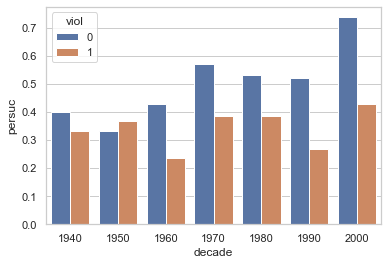

In [53]:
sns.barplot(x='decade',y='persuc',data=df3, hue='viol')
#theres slight difference to the original on the 2000 mark due to removing ongoing campaigns

## Question 4. Twenty-Five Largest Resistance Campaigns, 1900-2006

Create a table with the twenty-five largest resistance campaigns, for all years, based on their number of members at highest point (peak membership). The table should include the membership, the start year, the end year, the location, the target, whether it was violent or not, and whether it was successful or not. Notice if you find anything about Greece.

In [54]:
#question no4
#sort df2 by peakmembership
df2=df.sort_values('peakmembership', ascending=False)
df2['peakmembership'].head(10)

257    4500000.0
206    2000000.0
311    2000000.0
289    1000000.0
265    1000000.0
262    1000000.0
255    1000000.0
10     1000000.0
228    1000000.0
141    1000000.0
Name: peakmembership, dtype: float64

In [26]:
#create table with 25 campaigns with largest membership and the columns requested
df2=df2[['peakmembership','byear','eyear','location','target','viol','failure']].head(25)
df2
#notice greece for campaign : karamanlis regime

,peakmembership,byear,eyear,location,target,viol,failure
257,4500000.0,1937,1945,China,Japanese occupation,1,1
206,2000000.0,1977,1979,Iran,Shah Reza Pahlavi,0,0
311,2000000.0,1986,1983,Philippines,Ferdinand Marcos,0,0
289,1000000.0,1988,1988,Burma,military junta,0,1
265,1000000.0,1989,1989,China,Communist regime,0,1
262,1000000.0,1967,1968,China,anti-Maoists,1,1
255,1000000.0,1922,1949,China,Kuomintang regime,1,0
10,1000000.0,2006,2006,Mexico,Calderon regime,0,1
228,1000000.0,2005,2005,Lebanon,Syrian forces,0,0
141,1000000.0,1993,1999,Nigeria,Military rule,0,0


## Question 5. The Effect of Participation on the Probability of Campaign Success

Examine the effect of participation on the probability of campaign success. You should run a logistic regression for success on membership per capita, controlling for the location’s logged population the year the campaign ends. Explain your results.

Having done that, create a scatter plot showing the logged participants per capita, on the $x$ axis, and the probability of success, on the $y$ axis.

In [55]:
#question no 5
#first clean up mempc from Nan values
df1=df.dropna(subset=['mempc'])
df1.index

Int64Index([  0,   2,   9,  12,  13,  19,  21,  22,  24,  30,
            ...
            303, 304, 305, 308, 309, 311, 312, 319, 321, 322],
           dtype='int64', length=163)

In [56]:
#thats what were working with
df1[['mempc','success','lnpop']].head(10)

,mempc,success,lnpop
0,1.226839,1,8.819231
2,1.200712,1,8.585698
9,1.001202,1,11.499098
12,0.741234,1,8.083094
13,0.784924,0,9.317105
19,1.023090,0,8.503176
21,1.017789,0,7.866435
22,1.165337,0,8.161110
24,0.774153,0,7.739377
30,0.844079,0,9.004961


In [57]:

#train the model with the above data

In [58]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [59]:
df1mod = smf.logit("success ~ mempc + lnpop", data=df1)
df1res = df1mod.fit()
df1res.summary2()



Optimization terminated successfully.
         Current function value: 0.594790
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.129     
Dependent Variable: success          AIC:              199.9014  
Date:               2021-10-19 12:25 BIC:              209.1827  
No. Observations:   163              Log-Likelihood:   -96.951   
Df Model:           2                LL-Null:          -111.35   
Df Residuals:       160              LLR p-value:      5.5508e-07
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -5.8199    1.9207  -3.0301  0.0024  -9.5843  -2.0555
mempc          4.4892    0.9857   4.5545  0.0000   2.5573   6.4210
lnpop          0.0907    0.1285   0.7058  0.4803  -0.1612   0.3426
=================================================================

"""

In [60]:
#we observe that mempc has a strong postive correlation to the success with high coef and z and p=0  while lnpop has low (positive) correlation with low coef and z and p>0.05.
df1pred=df1res.predict(df1[['mempc','lnpop']])
df1pred

0      0.619573
2      0.586438
9      0.429948
12     0.146914
13     0.189858
         ...   
311    0.753807
312    0.604309
319    0.149632
321    0.208045
322    0.267679
Length: 163, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

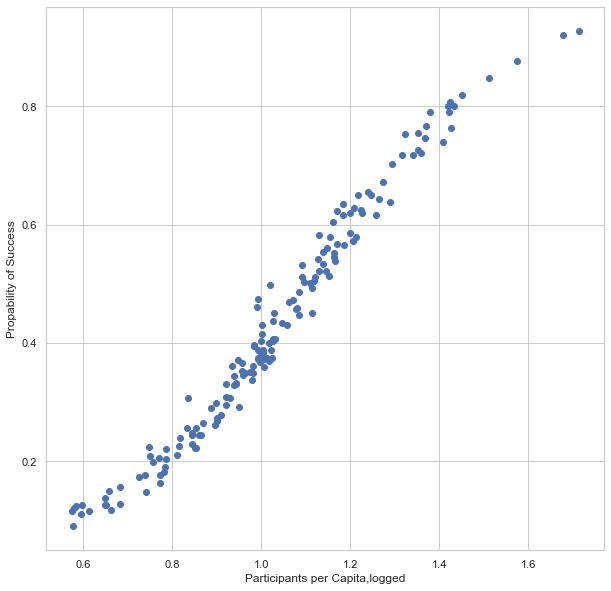

In [61]:
#create the plot
plt.figure(figsize=(10, 10))#just to make it bigger
plt.scatter(df1['mempc'],df1pred)
plt.xlabel('Participants per Capita,logged') 
plt.ylabel('Propability of Success')

plt.show

## Question 6. The Level of Participation Tipping Point

From the results you obtained in the previous question, find the percentage of the population that is the tipping point for success in a campaign.

In [62]:
#question no 6
#we observe that there is strong positive correlation between mempc and chances of campaign success
#the tipping point is the mempc value for which the propability of success divided by the propability of failure 1 is equal to 1.
#any mempc value above the tipping point will give an ration(success prob/failure prob)>1.
#we know that the log of this ration equals the sum of intercept coef and (mempc coef*xi)
#for the ratio to be equal to one, the log of the ration must be equal to zero 



In [63]:
#so lets solve the equation for the tipping point x value
x=(-(df1res.params['Intercept']))/df1res.params['mempc']
x
#here is the tipping point

1.296421415488382

## Question 7. Nonviolent Resistance, Target Regime Type, Geographical Location

1. Examine whether nonviolent resistance remains significant even if we control for the regime type. Run a logistic   regression of success on the nonviolence indicator controlling for the POLITY IV score of campaign target (`tpolity`), the log of peakmembership, and the location’s logged population the year the campaign ends.

2. Examine whether nonviolent resistance remains significant even if we control for geographical location of the compaign.

In [79]:
#question no 7
# Part 1:Run a logistic regression of success on the nonviolence indicator controlling for the POLITY IV score of campaign target (tpolity), the log of peakmembership, and the location’s logged population the year the campaign ends.
df2mod = smf.logit("success ~ nonviol + tpolity + lmembers + lnpop", data=df1)
df2res = df2mod.fit()
df2res.summary2()



Optimization terminated successfully.
         Current function value: 0.567143
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.163     
Dependent Variable: success          AIC:              169.9344  
Date:               2021-10-19 12:31 BIC:              184.6782  
No. Observations:   141              Log-Likelihood:   -79.967   
Df Model:           4                LL-Null:          -95.506   
Df Residuals:       136              LLR p-value:      2.9528e-06
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.1085    1.4130  -0.0768  0.9388  -2.8779   2.6609
nonviol        0.9048    0.4636   1.9517  0.0510  -0.0038   1.8134
tpolity        0.0520    0.0298   1.7439  0.0812  -0.0064   0.1104
lmembers       0.3751    0.1282   2.9264  0.0034   0.1239   0.6263
lnpop         -0.4363    0.1423  -3.0671  0.0022  -0.7151  -0.1575
=================================================================

"""

In [71]:
#taking into consideration that p=0.05 is the common limit of significance, we see that nonviolence marginally remains significant when controlling the rst ogf the variables
#lets see it visually
df2pred=df2res.predict(df1[['nonviol','tpolity','lmembers','lnpop']])
df2pred


0      0.409537
2      0.610446
9      0.600952
12     0.216879
13     0.218473
         ...   
311    0.758840
312    0.770275
319    0.115787
321    0.187550
322    0.397808
Length: 163, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

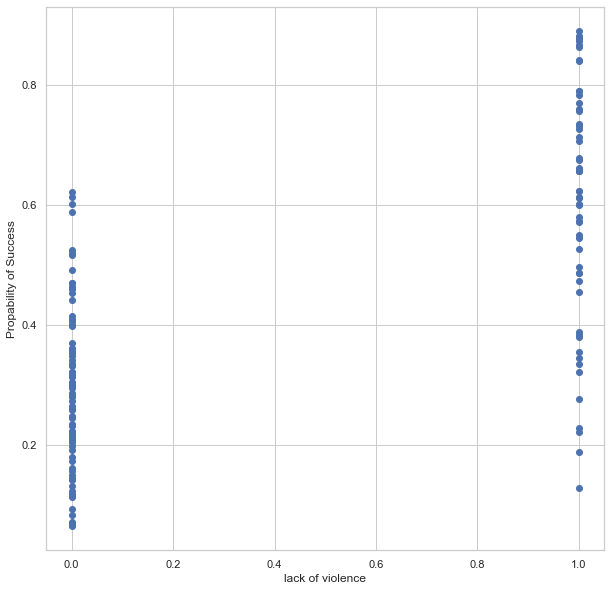

In [72]:
#create the plot
plt.figure(figsize=(10, 10))#just to make it bigger
plt.scatter(df1['nonviol'],df2pred)
plt.xlabel('lack of violence') 
plt.ylabel('Propability of Success')

plt.show

In [76]:
#Question 7 part 2:
#Examine whether nonviolent resistance remains significant even if we control for geographical location of the campaign.
#First i turn location from categorical column to numeric
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df1['location']=number.fit_transform(df1['location'].astype(str))
df1['location']

0      78
2      17
9      39
12     13
13     13
       ..
311    59
312    59
319    20
321    20
322    57
Name: location, Length: 163, dtype: int32

In [77]:
#then i create the model
df3mod = smf.logit("success ~ nonviol + location", data=df1)
df3res = df3mod.fit()
df3res.summary2()
#for nonviolence the P<0.05, also coeff and z are high, so nonviolence remains a significant predictor while controlling for location


Optimization terminated successfully.
         Current function value: 0.637062
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.067     
Dependent Variable: success          AIC:              213.6822  
Date:               2021-10-19 12:28 BIC:              222.9634  
No. Observations:   163              Log-Likelihood:   -103.84   
Df Model:           2                LL-Null:          -111.35   
Df Residuals:       160              LLR p-value:      0.00054552
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
------------------------------------------------------------------
Intercept      -0.4600    0.3482  -1.3209  0.1865  -1.1426  0.2226
nonviol         1.2531    0.3399   3.6862  0.0002   0.5868  1.9193
location       -0.0068    0.0062  -1.0985  0.2720  -0.0188  0.0053
=================================================================

"""

In [78]:
#additionally checking for the previous model by adding location we can still see that non violence remains significant
df3mod = smf.logit("success ~ nonviol + tpolity + lmembers + lnpop + location", data=df1)
df3res = df3mod.fit()
df3res.summary2()

Optimization terminated successfully.
         Current function value: 0.563658
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.168     
Dependent Variable: success          AIC:              170.9516  
Date:               2021-10-19 12:28 BIC:              188.6442  
No. Observations:   141              Log-Likelihood:   -79.476   
Df Model:           5                LL-Null:          -95.506   
Df Residuals:       135              LLR p-value:      5.7815e-06
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept      0.0595    1.4262   0.0417  0.9667  -2.7358   2.8548
nonviol        0.9500    0.4670   2.0345  0.0419   0.0348   1.8653
tpolity        0.0548    0.0302   1.8118  0.0700  -0.0045   0.1140
lmembers       0.3760    0.1282   2.9332  0.0034   0.1248   0.6272
lnpop         -0.4211    0.1412  -2.9814  0.0029  -0.6979  -0.1443
location      -0.0071    0.0072  -0.9860  0.3241  -0.0212   0.0070
=================================================================

"""